# Hypothesis Testing
* Notebook completed by Adam Lang
* Date: 4/15/2024
* This notebook will go over statistical hypothesis testing principles and python implementation.
* This was completed as part of the Springboard Data Science Fellowship and LinkedIn Learning course "Python Statistics Essential Training."

In [1]:
## import libraries
import math
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## import scipy libraries
import scipy.stats
import scipy.optimize
import scipy.spatial

# Case Study
* Hypothesis Testing using the famous Cholera outbreak example.
* Background and Brief History:
    * John Snow conducted pioneering investigations on cholera epidemics in England and particularly in London in 1854 in which he demonstrated that contaminated water was the key source of the epidemics.
    * His thorough investigation of an epidemic in the Soho district of London led to his conclusion that contaminated water from the Broad Street pump was the source of the disease and, consequently, the removal of the handle led to cessation of the epidemic.
    * Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7150208/

## Import 2 datasets
1. Dataset 1 - 'Pumps' - all water pumps in London in 1854
2. Dataset 2 - 'Cholera' - all deaths from Cholera in 1854 London + closest pump to that location

In [3]:
## dataset 1 - all pumps in London in 1854
pumps = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/pumps.csv')

# pumps head
pumps

,lat,lon,x,y
0,51.513341,-0.136668,0.000000,0.000000
1,51.513876,-0.139586,-0.201858,0.059469
2,51.514906,-0.139671,-0.207738,0.173961
3,51.512354,-0.131630,0.348513,-0.109712
4,51.512139,-0.133594,0.212650,-0.133611
5,51.511542,-0.135919,0.051813,-0.199972
6,51.510019,-0.133962,0.187193,-0.369265
7,51.511295,-0.138199,-0.105910,-0.227428


In [5]:
# upload
cholera = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/cholera.csv')


# print 1 record every 20 in the df
cholera.loc[0::20]

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


### Plot both datasets: Pumps vs. Cholera Deaths

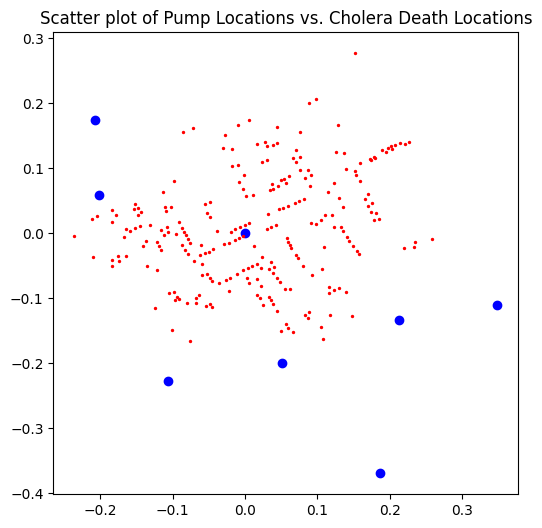

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(pumps.x, pumps.y, color='b')
plt.scatter(cholera.x, cholera.y, color='r', s=2)
plt.title('Scatter plot of Pump Locations vs. Cholera Death Locations');

### Overlay plot on map of London

In [8]:
import matplotlib

# load image using matplotlib
img = matplotlib.image.imread('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/london.png')

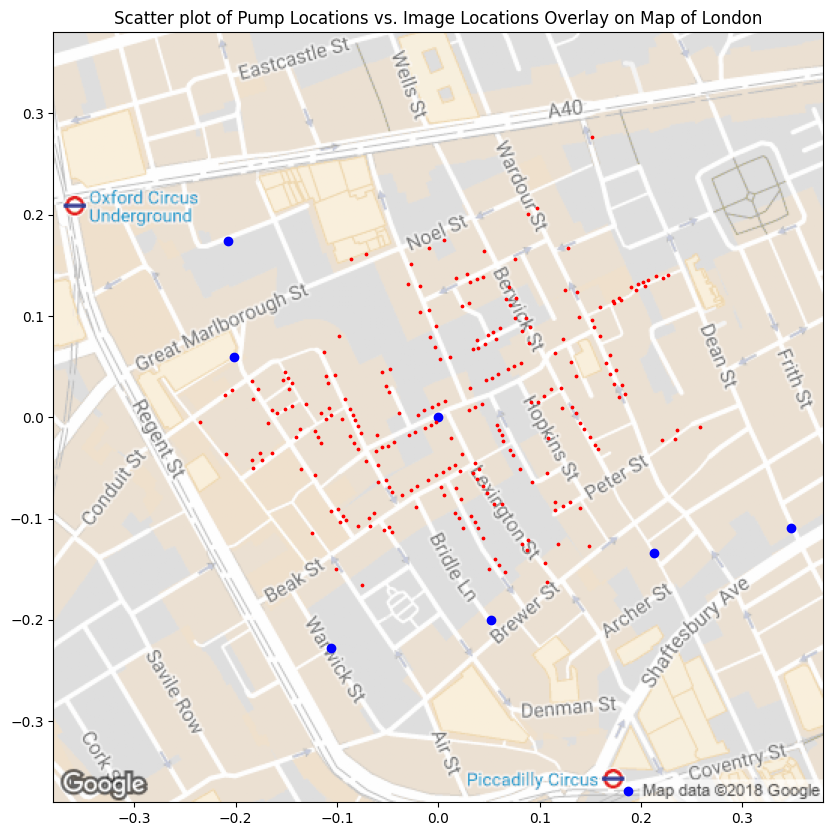

In [9]:
# show image with imshow()
plt.figure(figsize=(10,10))
plt.imshow(img, extent=[-0.38, 0.38, -0.38, 0.38])

plt.scatter(pumps.x, pumps.y, color='b')
plt.scatter(cholera.x, cholera.y, color='r',s=3)
plt.title("Scatter plot of Pump Locations vs. Image Locations Overlay on Map of London");


In [10]:
## Tally of addresses
cholera.closest.value_counts()

closest
0    171
1     36
4     19
5     13
7      9
2      2
Name: count, dtype: int64

### What are the total deaths closet to each pump?

In [11]:
cholera.groupby('closest').deaths.sum()

closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

Summary: We can see that there is NO DOUBT that `Pump 0` is where the most deaths from Cholera occurred.

### Write a hypothesis testing function

In [12]:
def simulate(n):
  return pd.DataFrame({'closest': np.random.choice([0,1,4,5], size=n, p=[0.65,0.15,0.10,0.10])})

In [13]:
## try this for total number of deaths 489
simulate(489).closest.value_counts()

closest
0    335
1     57
5     49
4     48
Name: count, dtype: int64

This is closest to what we actually get in our real dataset.

### Let's try this 10,000 times now

In [14]:
sampling = pd.DataFrame({'counts': [simulate(489).closest.value_counts()[0] for i in range(10000)]})

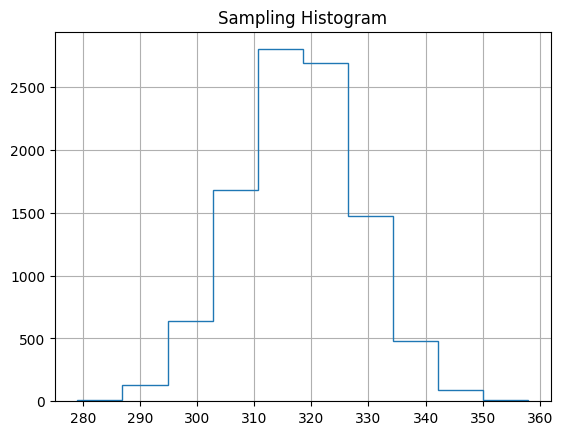

In [16]:
## plot a histogram of results
sampling.counts.hist(histtype='step')
plt.title('Sampling Histogram');

Summary:
* We have generated this distribution under the null hypothesis that the pumps have NOTHING to do with cholera, and the deaths occur simply related to the population.

In [17]:
# test the hypothesis of 340 deaths
scipy.stats.percentileofscore(sampling.counts,340)

98.145

Summary: 340 deaths is not what we would have expected.

In [19]:
# calculate p value
100 - 98.14

1.8599999999999994

We expect it 1.86% of the time.

# Null Hypothesis Test
* Observe statistic in data
* Compute sampling distribution of statistic under null hypothesis
* Quantile of observed statistic gives P value